In [2]:
with open("input.txt", 'r') as f:
    data = [l.strip() for l in f]

In [8]:
data[0:3]

['position=< 21373,  53216> velocity=<-2, -5>',
 'position=<-10460, -31621> velocity=< 1,  3>',
 'position=< 21353, -42222> velocity=<-2,  4>']

In [63]:
pos_x = np.array([int(d.split(",")[0].split('<')[1].strip()) for d in data])
pos_y = np.array([int(d.split(",")[1].split('>')[0].strip()) for d in data])

vel_x = np.array([int(d.split("=<")[-1].split(',')[0]) for d in data])
vel_y = np.array([int(d.split(",")[-1].split('>')[0]) for d in data])

In [64]:
import numpy as np
print len(pos_x)

328


In [65]:
a = pos_x
print (a[0])
a = pos_x + vel_x
print (a[0])

21373
21371


In [117]:
# class Point:
#     def __init__(self, x, y, vx, vy):
#         self.x = x
#         self.y = y
#         self.vx = vx
#         self.vy = vy
    
#     def updatePosition(self):
#         self.x += self.vx
#         self.y += self.vy
#         return x,y
        
#     def getMaxPos(self):
#         return np.max(self.x), np.max(self.y)
from matplotlib import pyplot as plt

class Sky:
    def __init__(self,px, py, vx, vy):
        self.px = px
        self.py = py
        self.vx = vx
        self.vy = vy
        
        self.curr_area = self.get_area()
        self.time = 0
    
    def update_sky(self):
        self.px = self.px + self.vx
        self.py = self.py + self.vy

        a = self.px + self.vx

        self.time+=1
    
    def get_area(self):
        return (np.max(self.py)-np.min(self.py))*(np.max(self.px)-np.min(self.px))
    
    def find_smallest_message(self):
        
        while True:

            self.update_sky()
#             if self.time%1000==0:
#                 print (self.get_area() <= self.curr_area)
#                 print (self.time, self.curr_area)
                
            new_area = self.get_area()
            if new_area < 1000:
                print ("Small area found")
                print (self.curr_area)
                print (self.time)
                self.curr_area = self.get_area()
                self.show_sky()
            elif new_area > self.curr_area:
                break
            else:
                self.curr_area = self.get_area()
            
        print (self.time, self.get_area())
        
    
    def show_sky(self):
        sky = np.zeros((np.max(self.py)-np.min(self.py)+1, np.max(self.px)-np.min(self.px)+1))
        sky[self.py-np.min(self.py), self.px-np.min(self.px)] = 1
        plt.figure()
        plt.imshow(sky)
        plt.show()

Small area found
1349
10605


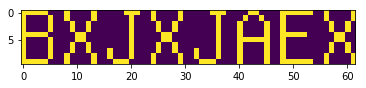

(10606, 1330)


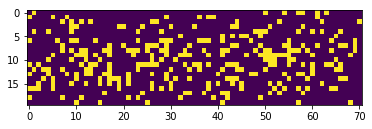

In [118]:
sky = Sky(pos_x, pos_y, vel_x, vel_y)
sky.find_smallest_message()
sky.show_sky()

In [ ]:
sky = np.zeros((y_range, x_range))
for d in data:
    